In [1]:
import pandas as pd
import numpy as np
import random
import os
from sklearn.preprocessing import OneHotEncoder
from neural_network_wrapper import NeuralNetworkWrapper

from sklearn.metrics import accuracy_score
import optimizers

import json

In [2]:
data = pd.read_csv("./projekt1/classification/data.simple.train.1000.csv")

X = np.array(data.loc[:, ['x', 'y']])
y = data.cls
y -= 1
#one hot encoding
y_ohc = np.zeros((y.size, int(np.max(y))+1))
y_ohc[np.arange(y.size),y.astype(np.int)] = 1
y = y_ohc

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [3]:
input_dim = 2
neuron_numbers = [4, 4, 2]
activation_functions = ['relu', 'relu', 'sigmoid']
loss_function = 'logistic_loss'
learning_rate = 0.001
optimizer = optimizers.Optimizer()
batch_size = 128
val_split = 0.1
num_epochs=50
seed=42
dataset_name="test"
experiment_name="LR = 0.001"

experiment_dict = {
    "input_dim" : input_dim,
    "neuron_numbers" : neuron_numbers, # number of neurons in consecutive layers
    "activation_functions" : activation_functions,
    "loss_function" : loss_function,
    "learning_rate" : learning_rate,
    "optimizer" : optimizer,
    "batch_size" : batch_size,
    "validation_split" : val_split,
    "num_epochs" : num_epochs,
    "seed" : seed,
    "dataset_name" : dataset_name,
    "experiment_name" : experiment_name
}

In [4]:
def experiments_pipeline(X,
                         y,
                         experiment_dict,
                         num_reps=1,
                         save_to_file=False):
    """
    """
    d = experiment_dict.copy()
    
    
    
    d['loss_on_epoch'] = []
    d['loss_on_epoch_valid'] = []
    d['accuracy_on_epoch'] = []
    d['accuracy_on_epoch_valid'] = []
    
    
    for i in range(num_reps):
        print(f"Experiment {i+1}/{num_reps}")
    
        # reproducibility issues
        random.seed(d['seed'] + i)
        np.random.seed(d['seed'] + i)
    
        NN = NeuralNetworkWrapper(d['input_dim'],
                              d['neuron_numbers'],
                              d['activation_functions'],
                              d['loss_function'],
                              d['learning_rate'],
                              d['optimizer'],
                              d['batch_size'])
        NN.train(X,
                  y,
                  d['num_epochs'],
                  d['validation_split'],
                cache_accuracy=True,
                verbosity=False)

        d['loss_on_epoch'].append(NN.loss_on_epoch)
        d['loss_on_epoch_valid'].append(NN.loss_on_epoch_valid)
        d['accuracy_on_epoch'].append(NN.accuracy)
        d['accuracy_on_epoch_valid'].append(NN.accuracy_valid)

    # aggregating results
    d['train_loss_mean'] = np.mean(np.array(d['loss_on_epoch']).T, axis=1)
    d['valid_loss_mean'] = np.mean(np.array(d['loss_on_epoch_valid']).T, axis=1)
    d['train_accuracy_mean'] = np.mean(np.array(d['accuracy_on_epoch']).T, axis=1)
    d['valid_accuracy_mean'] = np.mean(np.array(d['accuracy_on_epoch_valid']).T, axis=1)
    
    d['train_loss_std'] = np.std(np.array(d['loss_on_epoch']).T, axis=1)
    d['valid_loss_std'] = np.std(np.array(d['loss_on_epoch_valid']).T, axis=1)
    d['train_accuracy_std'] = np.std(np.array(d['accuracy_on_epoch']).T, axis=1)
    d['valid_accuracy_std'] = np.std(np.array(d['accuracy_on_epoch_valid']).T, axis=1)
    
    
    #TODO: how to evaluate optimizers? Object cannot be saved to a JSON file
    try:
        del d['optimizer']
    except:
        pass
    
    if save_to_file:
        filename = d['experiment_name'] + '_' + d['dataset_name'] + '.json'
        
        if filename in os.listdir():
            raise Exception(f"File {filename} already exists!")
        else:
            with open(filename, 'w') as file:
                json.dump(d, file)
            print("File successfully saved!")
        
    return d

In [5]:
output1 = experiments_pipeline(X, y, experiment_dict, num_reps=100)

Experiment 1/100
Final loss: 1.410
Experiment 2/100
Final loss: 1.397
Experiment 3/100
Final loss: 2.009
Experiment 4/100
Final loss: 1.433
Experiment 5/100
Final loss: 1.993
Experiment 6/100
Final loss: 1.554
Experiment 7/100
Final loss: 1.533
Experiment 8/100
Final loss: 1.237
Experiment 9/100
Final loss: 1.423
Experiment 10/100
Final loss: 1.406
Experiment 11/100
Final loss: 1.069
Experiment 12/100
Final loss: 1.329
Experiment 13/100
Final loss: 1.335
Experiment 14/100
Final loss: 1.397
Experiment 15/100
Final loss: 1.601
Experiment 16/100
Final loss: 1.248
Experiment 17/100
Final loss: 1.456
Experiment 18/100
Final loss: 1.987
Experiment 19/100
Final loss: 1.116
Experiment 20/100
Final loss: 1.556
Experiment 21/100
Final loss: 1.559
Experiment 22/100
Final loss: 1.111
Experiment 23/100
Final loss: 1.292
Experiment 24/100
Final loss: 1.478
Experiment 25/100
Final loss: 0.789
Experiment 26/100
Final loss: 1.379
Experiment 27/100
Final loss: 1.275
Experiment 28/100
Final loss: 1.593
E

In [16]:
input_dim = 2
neuron_numbers = [4, 4, 2]
activation_functions = ['relu', 'relu', 'sigmoid']
loss_function = 'logistic_loss'
learning_rate = 0.01
optimizer = optimizers.Optimizer()
batch_size = 128
val_split = 0.1
num_epochs=50
seed=42
dataset_name="test"
experiment_name="LR = 0.01"

experiment_dict = {
    "input_dim" : input_dim,
    "neuron_numbers" : neuron_numbers, # number of neurons in consecutive layers
    "activation_functions" : activation_functions,
    "loss_function" : loss_function,
    "learning_rate" : learning_rate,
    "optimizer" : optimizer,
    "batch_size" : batch_size,
    "validation_split" : val_split,
    "num_epochs" : num_epochs,
    "seed" : seed,
    "dataset_name" : dataset_name,
    "experiment_name" : experiment_name
}

In [17]:
output2 = experiments_pipeline(X, y, experiment_dict, num_reps=100)

Experiment 1/100
Final loss: 0.781
Experiment 2/100
Final loss: 0.294
Experiment 3/100
Final loss: 1.354
Experiment 4/100
Final loss: 0.693
Experiment 5/100
Final loss: 0.500
Experiment 6/100
Final loss: 1.393
Experiment 7/100
Final loss: 0.300
Experiment 8/100
Final loss: 0.267
Experiment 9/100
Final loss: 1.046
Experiment 10/100
Final loss: 1.380
Experiment 11/100
Final loss: 0.294
Experiment 12/100
Final loss: 0.446
Experiment 13/100
Final loss: 0.540
Experiment 14/100
Final loss: 1.137
Experiment 15/100
Final loss: 1.338
Experiment 16/100
Final loss: 0.619
Experiment 17/100
Final loss: 0.457
Experiment 18/100
Final loss: 1.398
Experiment 19/100
Final loss: 0.437
Experiment 20/100
Final loss: 1.043
Experiment 21/100
Final loss: 0.523
Experiment 22/100
Final loss: 0.503
Experiment 23/100
Final loss: 0.604
Experiment 24/100
Final loss: 1.391
Experiment 25/100
Final loss: 0.247
Experiment 26/100
Final loss: 1.074
Experiment 27/100
Final loss: 0.283
Experiment 28/100
Final loss: 0.873
E

In [18]:
import matplotlib.pyplot as plt

In [19]:
d = output1
d1 = output2

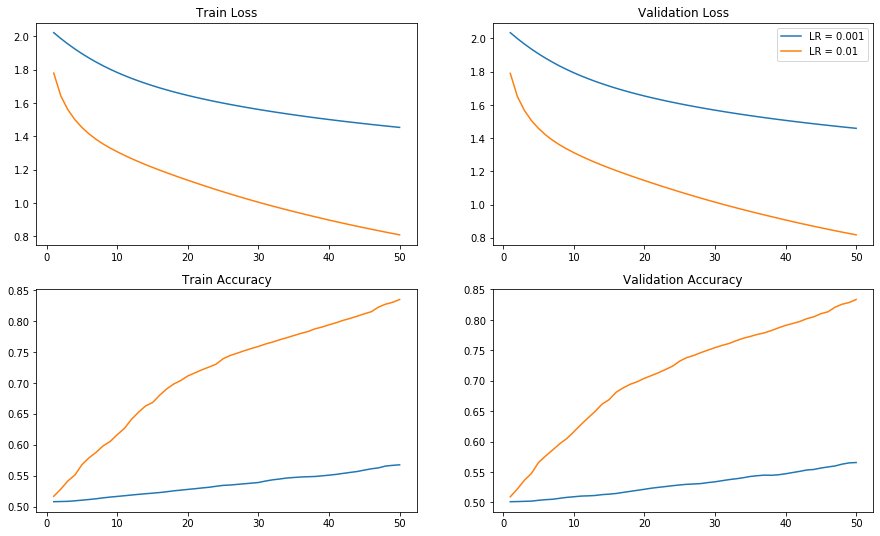

In [45]:
fig, a = plt.subplots(2, 2)

#plt.figure(figsize=(21,12))

a[0][0].plot([i+1 for i in range(d['num_epochs'])], d['train_loss_mean'], label = d['experiment_name'])
a[0][1].plot([i+1 for i in range(d['num_epochs'])], d['valid_loss_mean'], label = d['experiment_name'])
a[1][0].plot([i+1 for i in range(d['num_epochs'])], d['train_accuracy_mean'], label = d['experiment_name'])
a[1][1].plot([i+1 for i in range(d['num_epochs'])], d['valid_accuracy_mean'], label = d['experiment_name'])

a[0][0].plot([i+1 for i in range(d1['num_epochs'])], d1['train_loss_mean'], label = d1['experiment_name'])
a[0][1].plot([i+1 for i in range(d1['num_epochs'])], d1['valid_loss_mean'], label = d1['experiment_name'])
a[1][0].plot([i+1 for i in range(d1['num_epochs'])], d1['train_accuracy_mean'], label = d1['experiment_name'])
a[1][1].plot([i+1 for i in range(d1['num_epochs'])], d1['valid_accuracy_mean'], label = d1['experiment_name'])

a[0][1].legend(loc="upper right")

a[0][0].title.set_text('Train Loss')
a[0][1].title.set_text('Validation Loss')
a[1][0].title.set_text('Train Accuracy')
a[1][1].title.set_text('Validation Accuracy')

fig.set_figheight(9)
fig.set_figwidth(15)

plt.show()